In [1]:
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import remove_stopwords
from database.pymysql_conn import DataBase
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
np.random.seed(777)

In [3]:
db = DataBase()

In [4]:
SQL = "SELECT gameName ,text FROM steam.yt_comment where filter=0 and language='en';"

In [5]:
df = db.to_df(SQL)

In [6]:
df

,gameName,text
0,DEAD OR ALIVE Xtreme Venus Vacation,Oh trust me it got boring soo fast when I firs...
1,DEAD OR ALIVE Xtreme Venus Vacation,"I agree, in doaescarlet you can collect money ..."
2,DEAD OR ALIVE Xtreme Venus Vacation,What gacha game isn't lol.
3,DEAD OR ALIVE Xtreme Venus Vacation,The game is perfectly playable without spendin...
4,DEAD OR ALIVE Xtreme Venus Vacation,The game is not that bad as long as you put mo...
...,...,...
448719,OVR Toolkit,Any idea on how people can see it on stream as...
448720,OVR Toolkit,"Pretty cool and simple, I just started with th..."
448721,OVR Toolkit,Thank you! Been trying to work out how to get ...
448722,OVR Toolkit,Thx looks cool will try it when i get my vr he...


In [7]:
def clean_text(text):
    t = re.sub('[^a-zA-Z0-9]',' ', text).strip()
    t = re.sub(' +', ' ', t)
    t = t.lower()
    # Stop words
    t = remove_stopwords(t)
    return t

In [8]:
comments = df['text'].apply(clean_text).str.split().to_numpy()

In [9]:
gameName = df['gameName'].to_numpy()

In [10]:
df['text']

0         Oh trust me it got boring soo fast when I firs...
1         I agree, in doaescarlet you can collect money ...
2                                What gacha game isn't lol.
3         The game is perfectly playable without spendin...
4         The game is not that bad as long as you put mo...
                                ...                        
448719    Any idea on how people can see it on stream as...
448720    Pretty cool and simple, I just started with th...
448721    Thank you! Been trying to work out how to get ...
448722    Thx looks cool will try it when i get my vr he...
448723    Awesome work. I'm amazed by how concise the me...
Name: text, Length: 448724, dtype: object

In [11]:
corpus = []
for g, c  in zip(gameName, comments):
    text = [g] + c
    corpus.append(text)

In [12]:
corpus[10001]

['Assassins Creed III Remastered', 'ive', 'waiting', 'long']

In [13]:
embedding_model = Word2Vec(corpus, size=100,
                           window=10, min_count=20, workers=1, iter=3, sg=1, seed=777)

In [14]:
print(embedding_model.most_similar(positive=["F1 2019"], topn=100))

[('ben', 0.7508294582366943), ('monaco', 0.7114884257316589), ('MotoGP19', 0.7091511487960815), ('mercedes', 0.7041588425636292), ('teammate', 0.6908013224601746), ('ferrari', 0.6898654699325562), ('renault', 0.685786247253418), ('driver', 0.6804300546646118), ('weber', 0.6753307580947876), ('gp', 0.6741859912872314), ('race', 0.6727557182312012), ('aarava', 0.6702241897583008), ('verstappen', 0.6695427894592285), ('podium', 0.6664971113204956), ('f1', 0.6658294200897217), ('vettel', 0.6641377210617065), ('hamilton', 0.6596968173980713), ('leclerc', 0.6595472097396851), ('rosso', 0.6591892242431641), ('gasly', 0.6534390449523926), ('toro', 0.6514818668365479), ('alfa', 0.6500883102416992), ('williams', 0.6492998003959656), ('races', 0.6447962522506714), ('mclaren', 0.6442257761955261), ('devote', 0.6397534012794495), ('overtake', 0.6395209431648254), ('senna', 0.6380167603492737), ('sainte', 0.6312745809555054), ('albon', 0.6298542618751526), ('spa', 0.6270476579666138), ('drivers', 0.

C:\Users\oasis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [15]:
embedding_model["good"]

C:\Users\oasis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.6051109 , -0.07687097, -0.24611434,  0.13100974, -0.07187219,
        0.02015404, -0.16951175,  0.29601073,  0.18565272, -0.14568141,
       -0.06460345,  0.15989186,  0.14483015, -0.06763737, -0.28849027,
        0.33166453,  0.29416662, -0.47721955,  0.30137286, -0.16061959,
        0.07116176, -0.08897791,  0.02262543, -0.05573563,  0.0646619 ,
        0.3505758 , -0.20396462, -0.15495758,  0.06039795, -0.25271258,
       -0.20297447, -0.0668463 ,  0.17478006, -0.2981745 , -0.36480132,
       -0.12723884, -0.07553028, -0.06099635, -0.34325218,  0.29039618,
        0.01858459,  0.04135692, -0.13891554,  0.35687995,  0.03803534,
        0.3416078 , -0.12024637,  0.09912045,  0.11421983, -0.00241725,
        0.07205199, -0.00188693,  0.13183862,  0.02003725,  0.04562867,
       -0.15229417, -0.34117597, -0.48897916, -0.36284018,  0.19372061,
       -0.15003914,  0.21832618,  0.2505123 , -0.21806325, -0.00391965,
        0.3989579 ,  0.09959165, -0.6511226 , -0.01846301,  0.07

In [16]:
len(embedding_model.wv.vocab)
# 이 단어들을 모두 뿌려보자 (기존 게임명과 별개로)

10634

In [17]:
len(embedding_model.wv.vocab.keys())

10634

In [18]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [19]:
success = ["Dota Underlords",
            "Borderlands GOTY Enhanced",
            "Anno 1800",
            "F1 2019",
            "DEAD OR ALIVE Xtreme Venus Vacation",
            "RAGE 2",
            "OCTOPATH TRAVELER",
            "Lords Mobile",
            "Pro Cycling Manager 2019",
            "Ironsight",
            "Yakuza Kiwami 2", # 10
            "Pagan Online",
            "Monster Girl Island Prologue",
            "Winning Post 9",
            "Assassins Creed III Remastered",
            "Otakus Adventure",
            "SUPER DRAGON BALL HEROES WORLD MISSION",
            "AVA Dog Tag"] # 500++

C:\Users\oasis\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


<IPython.core.display.Javascript object>


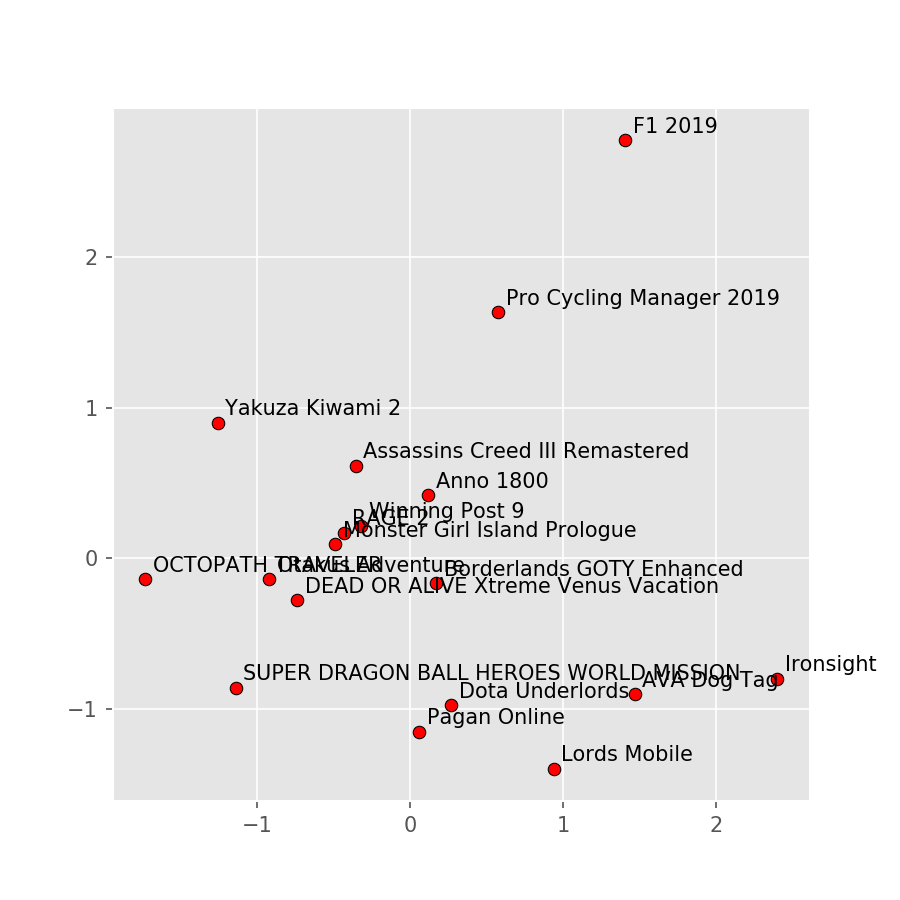

In [20]:
display_pca_scatterplot(embedding_model, 
                       success)

In [21]:
name, count = np.unique(gameName, return_counts=True)

In [22]:
target = []
target_label = []

for n, c in zip(name, count):
    if c > 20:
        target.append(n)
        if n in success:
            target_label.append("blue")
        else:
            target_label.append("red")

In [23]:
target

['AVA Dog Tag',
 'Anno 1800',
 'Assassins Creed III Remastered',
 'Atelier Lulua The Scion of Arland',
 'Battle for the Galaxy',
 'BirdGut',
 'Blood Fresh Supply',
 'Borderlands GOTY Enhanced',
 'Burning Daylight',
 'Children of Morta Demo',
 'Conan Unconquered',
 'Cricket Captain 2019',
 'DEAD OR ALIVE Xtreme Venus Vacation',
 'Dark Swords',
 'Dota Underlords',
 'Embark',
 'Esports Life Tycoon',
 'F1 2019',
 'FIVE NIGHTS AT FREDDYS VR HELP WANTED',
 'Fantasy Girl',
 'Furry Girl',
 'HARDCORE MECHA',
 'Ironsight',
 'Kao the Kangaroo Round 2',
 'Kards',
 'Last Epoch',
 'Layers of Fear 2',
 'Lords Mobile',
 'Lovers of Aether',
 'MASS Builder Demo',
 'Monster Girl Island Prologue',
 'MotoGP19',
 'Nelke the Legendary Alchemists Ateliers of the New World',
 'Neon Beats',
 'Neon Boost',
 'OCTOPATH TRAVELER',
 'OVR Toolkit',
 'Otakus Adventure',
 'Pagan Online',
 'Paper Dolls Original',
 'Pro Cycling Manager 2019',
 'Project Zero Deaths',
 'Quake II RTX',
 'RAGE 2',
 'STAR WARS Battlefront Cla

In [24]:
embedding_model.wv.vocab.keys()

dict_keys(['DEAD OR ALIVE Xtreme Venus Vacation', 'oh', 'trust', 'got', 'boring', 'soo', 'fast', 'seen', 'ill', 'buy', '3rd', 'game', 'especially', 'dlc', 'second', 'better', 'activities', 's', 'beach', 'vacation', 'wish', 'come', 'girls', 'understand', 'want', 'lewd', 'waifu', 'thought', 'going', 'characters', 'tournaments', 'basic', 'zoom', 'titties', 'agree', 'collect', 'money', 'costumes', 'playing', 'o', 'r', 'buying', 'tickets', 'real', 'play', 't', 'spend', 'doa', '6', 'prices', 'core', 'costs', 'tecmo', 'koei', 'makes', 'unfair', 'gacha', 'isn', 'lol', 'perfectly', 'playable', 'spending', 'yen', 'paid', 'stuff', 'ridiculous', 'sure', 'little', 'content', 'actually', 'blocked', 'paywall', 'normal', 'free', 'spent', 'rolled', 'dozens', 'bad', 'long', 'need', 'pay', 'stones', 'rewards', 'talking', 'different', 'ps', 'trying', 'bash', 'video', 'share', 'opinions', 'remember', 'mainly', 'making', 'seeing', 'covering', 'feel', 'strange', 'happy', 'inside', 'saw', 'comment', 'said', '

In [25]:
embedding_model.wv[embedding_model.wv.vocab.keys()]

array([[-0.04819739, -0.33102697,  0.1648352 , ..., -0.17256166,
         0.03306745, -0.04304589],
       [-0.35682717,  0.4777966 ,  0.1154092 , ..., -0.06721801,
         0.19236955, -0.38188723],
       [ 0.14702326, -0.11861633, -0.1534698 , ...,  0.1307627 ,
         0.41215724,  0.15423107],
       ...,
       [-0.33223867,  0.1526697 ,  0.20942146, ...,  0.09868976,
        -0.07336514,  0.08375383],
       [-0.3418879 ,  0.12363011,  0.19700414, ..., -0.02200215,
        -0.04396932,  0.05133626],
       [-0.01012555, -0.24626347, -0.2828492 , ..., -0.1704674 ,
         0.04973564,  0.1453823 ]], dtype=float32)

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(n_components=2, random_state=777)

In [28]:
coord = tsne.fit_transform(embedding_model.wv[embedding_model.wv.vocab.keys()])
# twodim = PCA().fit_transform(embedding_model.wv[embedding_model.wv.vocab.keys()])[:,:2]

In [29]:
# origin
# coord = tsne.fit_transform(embedding_model[target])
# twodim = PCA().fit_transform(embedding_model[target])[:,:2]

In [30]:
use = coord

# origin
# tsne_coord = pd.concat([pd.DataFrame(use), pd.Series(target)], axis=1)

all_target= [x for x in embedding_model.wv.vocab.keys()]

tsne_coord = pd.concat([pd.DataFrame(use), pd.Series(all_target)], axis=1)
tsne_coord.columns = ['x_coord', 'y_coord', 'game']

In [31]:
label = []
alpha = []
names = np.unique(gameName)
for x in embedding_model.wv.vocab.keys():
    if x in names:
        if x in success:
            label.append("green")
            alpha.append(1)
        else:
            label.append("red")
            alpha.append(1)
    else:
        label.append("gray")
        alpha.append(0.3)

In [32]:
# origin
# tsne_coord['color'] = target_label
tsne_coord['color'] = label
tsne_coord['alpha'] = alpha

In [33]:
tsne_coord

,x_coord,y_coord,game,color,alpha
0,6.103346,26.171066,DEAD OR ALIVE Xtreme Venus Vacation,green,1.0
1,-12.466697,52.349659,oh,gray,0.3
2,-2.916276,-1.456578,trust,gray,0.3
3,-22.203228,12.834262,got,gray,0.3
4,-0.770688,-40.661251,boring,gray,0.3
...,...,...,...,...,...
10629,59.316319,1.158009,hulkenberg,gray,0.3
10630,60.874626,4.448962,heroics,gray,0.3
10631,12.427547,43.767910,puncture,gray,0.3
10632,60.698948,4.100798,sainte,gray,0.3


In [34]:
from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.models import HoverTool, ColumnDataSource, value

output_notebook()

Loading BokehJS ...

In [35]:
plot_data = ColumnDataSource(tsne_coord)

In [36]:
plot_data

ColumnDataSource(id='1002', ...)

In [37]:
tsne_plot = figure(title='t-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   active_scroll='wheel_zoom'
                  )

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = '@game') )

tsne_plot.circle('x_coord', 'y_coord', source=plot_data, 
                 size=10, fill_color='color', fill_alpha='alpha', line_color=None)

# adjust visual elements of the plot
tsne_plot.title.text_font_size = value('16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# show time!
output_file("bokeh.html")
show(tsne_plot);